# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
genome_ids = ['HG03238', 'HG02601', 'HG03237', 'HG03624', 'HG03229', 'HG03660', 'HG03631', 'HG02648', 'HG02731', 'HG01583', 'HG02737', 'HG03019', 'HG02603', 'HG02685', 'HG02682', 'HG02727', 'HG02784', 'HG02775', 'HG02604', 'HG02490', 'HG02700', 'HG03021', 'HG02790', 'HG02649', 'HG02783', 'HG03767', 'HG01589', 'HG02696', 'HG02597', 'HG03634', 'HG02657', 'HG03708', 'HG02733', 'HG02697', 'HG02789', 'HG03640', 'HG02793', 'HG02688', 'HG03016', 'HG02787', 'HG03488', 'HG03663', 'HG02652', 'HG02661', 'HG03619', 'HG02684', 'HG03228', 'HG03652', 'HG01593', 'HG03653', 'HG03636', 'HG02691', 'HG03667', 'HG03649', 'HG03235', 'HG02694', 'HG03705', 'HG03702', 'HG02778', 'HG02600', 'HG02493', 'HG02724', 'HG02681', 'HG02725', 'HG02734', 'HG03625', 'HG02491', 'HG03022', 'HG02699', 'HG02658', 'HG03490', 'HG03491', 'HG01586', 'HG02654', 'HG03629', 'HG02736', 'HG03234', 'HG02690', 'HG02494', 'HG02786', 'HG03668', 'HG03709', 'HG03706', 'HG03765', 'HG02792', 'HG02774', 'HG03015', 'HG02655', 'HG02660', 'HG02651', 'HG03762', 'HG03703', 'HG02687', 'HG02728', 'HG03018', 'HG02780']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [3]:
root_dir = join(Path.home(),"cp_als/populations")

In [4]:
infile = join(root_dir,"output/PJL/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/PJL/all.csv'

In [5]:
df = pd.read_csv(infile)

In [6]:
df = df[genome_ids + ['gene']]
df.head()

,HG03238,HG02601,HG03237,HG03624,HG03229,HG03660,HG03631,HG02648,HG02731,HG01583,...,HG02655,HG02660,HG02651,HG03762,HG03703,HG02687,HG02728,HG03018,HG02780,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,HG03238,HG02601,HG03237,HG03624,HG03229,HG03660,HG03631,HG02648,HG02731,HG01583,...,HG03015,HG02655,HG02660,HG02651,HG03762,HG03703,HG02687,HG02728,HG03018,HG02780
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,9,9,6,13,5,4,35,4,37,...,24,25,2,20,3,27,5,21,19,22
ANG,0,0,10,1,6,0,11,0,0,2,...,0,0,2,0,7,10,6,0,0,0
ATXN2,157,22,10,21,25,26,8,10,20,13,...,6,19,24,17,10,13,15,14,6,10
C19ORF12,11,6,7,11,18,14,17,10,7,13,...,10,1,12,11,7,5,13,5,9,8
C9ORF72,14,25,16,34,32,35,22,2,20,37,...,24,23,35,12,13,15,47,31,16,24


## Compute mean99

In [9]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [10]:
mean99.head()

,0
HG03238,16.949495
HG02601,13.646465
HG03237,14.797980
HG03624,16.252525
HG03229,9.656566


In [11]:
m99 = mean99.transpose()

In [12]:
m99

,HG03238,HG02601,HG03237,HG03624,HG03229,HG03660,HG03631,HG02648,HG02731,HG01583,...,HG03015,HG02655,HG02660,HG02651,HG03762,HG03703,HG02687,HG02728,HG03018,HG02780
0,16.949495,13.646465,14.79798,16.252525,9.656566,12.959596,13.444444,14.050505,19.282828,18.818182,...,16.666667,13.383838,14.212121,16.323232,14.272727,12.515152,16.848485,17.363636,15.606061,12.909091


## Name the row "mean99" to append to the dataframe 

In [13]:
m99.index=["mean99"]

In [14]:
m99.head()

,HG03238,HG02601,HG03237,HG03624,HG03229,HG03660,HG03631,HG02648,HG02731,HG01583,...,HG03015,HG02655,HG02660,HG02651,HG03762,HG03703,HG02687,HG02728,HG03018,HG02780
mean99,16.949495,13.646465,14.79798,16.252525,9.656566,12.959596,13.444444,14.050505,19.282828,18.818182,...,16.666667,13.383838,14.212121,16.323232,14.272727,12.515152,16.848485,17.363636,15.606061,12.909091


## Compute statistics per genome, across all genes

In [15]:
genome_stats= sdf.describe()

In [16]:
genome_stats.head()

,HG03238,HG02601,HG03237,HG03624,HG03229,HG03660,HG03631,HG02648,HG02731,HG01583,...,HG03015,HG02655,HG02660,HG02651,HG03762,HG03703,HG02687,HG02728,HG03018,HG02780
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,46.611111,37.527778,40.694444,44.694444,26.555556,35.638889,36.972222,38.638889,53.027778,51.750000,...,45.833333,36.805556,39.083333,44.888889,39.250000,34.416667,46.333333,47.750000,42.916667,35.500000
std,194.036415,143.307758,185.498836,193.565319,82.709282,119.218683,158.485779,156.707034,198.908663,187.577241,...,148.278213,164.929737,165.703931,179.438613,153.424225,103.268409,161.480118,199.887593,166.874012,147.924788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,1.000000,2.750000,0.750000,3.000000,1.000000,1.750000,2.000000,...,1.000000,1.000000,2.000000,2.750000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000


### Adding new rows for genomes to show variant statistics

In [17]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [18]:
genome_stats_df

,HG03238,HG02601,HG03237,HG03624,HG03229,HG03660,HG03631,HG02648,HG02731,HG01583,...,HG03015,HG02655,HG02660,HG02651,HG03762,HG03703,HG02687,HG02728,HG03018,HG02780
ALS2,4.000000,9.000000,9.000000,6.000000,13.000000,5.000000,4.000000,35.000000,4.000000,37.000000,...,24.000000,25.000000,2.000000,20.000000,3.000000,27.000000,5.000000,21.000000,19.000000,22.000000
ANG,0.000000,0.000000,10.000000,1.000000,6.000000,0.000000,11.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,7.000000,10.000000,6.000000,0.000000,0.000000,0.000000
ATXN2,157.000000,22.000000,10.000000,21.000000,25.000000,26.000000,8.000000,10.000000,20.000000,13.000000,...,6.000000,19.000000,24.000000,17.000000,10.000000,13.000000,15.000000,14.000000,6.000000,10.000000
C19ORF12,11.000000,6.000000,7.000000,11.000000,18.000000,14.000000,17.000000,10.000000,7.000000,13.000000,...,10.000000,1.000000,12.000000,11.000000,7.000000,5.000000,13.000000,5.000000,9.000000,8.000000
C9ORF72,14.000000,25.000000,16.000000,34.000000,32.000000,35.000000,22.000000,2.000000,20.000000,37.000000,...,24.000000,23.000000,35.000000,12.000000,13.000000,15.000000,47.000000,31.000000,16.000000,24.000000
CHCHD10,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000,...,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000
CHMP2B,3.000000,10.000000,12.000000,3.000000,17.000000,2.000000,9.000000,21.000000,12.000000,6.000000,...,12.000000,9.000000,9.000000,15.000000,10.000000,10.000000,12.000000,0.000000,11.000000,5.000000
CHRNA3,13.000000,19.000000,29.000000,21.000000,19.000000,23.000000,5.000000,5.000000,28.000000,22.000000,...,25.000000,22.000000,23.000000,14.000000,19.000000,5.000000,5.000000,30.000000,5.000000,23.000000
CREST,6.000000,88.000000,4.000000,92.000000,6.000000,0.000000,5.000000,1.000000,87.000000,86.000000,...,86.000000,6.000000,4.000000,88.000000,90.000000,86.000000,82.000000,86.000000,2.000000,2.000000
DAO,3.000000,2.000000,4.000000,8.000000,0.000000,2.000000,7.000000,1.000000,7.000000,1.000000,...,1.000000,2.000000,1.000000,7.000000,0.000000,2.000000,5.000000,7.000000,0.000000,6.000000


### Compute per gene stats

In [19]:
gene_df = sdf.transpose().describe()

In [20]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,96.0,12.802083,10.379757,0.0,4.00,8.5,21.00,51.0
ANG,96.0,4.958333,5.257409,0.0,0.00,5.0,8.00,24.0
ATXN2,96.0,17.031250,15.790372,3.0,10.00,14.5,21.00,157.0
C19ORF12,96.0,9.739583,4.003274,1.0,7.00,10.0,12.00,20.0
C9ORF72,96.0,20.395833,10.558588,0.0,12.75,21.0,28.50,47.0
CHCHD10,96.0,1.020833,0.680235,0.0,1.00,1.0,1.00,3.0
CHMP2B,96.0,9.020833,4.844920,0.0,5.00,10.0,12.00,24.0
CHRNA3,96.0,17.937500,7.504122,1.0,13.75,19.0,23.00,30.0
CREST,96.0,34.947917,40.126476,0.0,2.75,6.0,86.00,101.0


In [21]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [22]:
rdf.head()

,HG03238,HG02601,HG03237,HG03624,HG03229,HG03660,HG03631,HG02648,HG02731,HG01583,...,HG03018,HG02780,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,9,9,6,13,5,4,35,4,37,...,19,22,96.0,12.802083,10.379757,0.0,4.00,8.5,21.0,51.0
ANG,0,0,10,1,6,0,11,0,0,2,...,0,0,96.0,4.958333,5.257409,0.0,0.00,5.0,8.0,24.0
ATXN2,157,22,10,21,25,26,8,10,20,13,...,6,10,96.0,17.031250,15.790372,3.0,10.00,14.5,21.0,157.0
C19ORF12,11,6,7,11,18,14,17,10,7,13,...,9,8,96.0,9.739583,4.003274,1.0,7.00,10.0,12.0,20.0
C9ORF72,14,25,16,34,32,35,22,2,20,37,...,16,24,96.0,20.395833,10.558588,0.0,12.75,21.0,28.5,47.0


In [23]:
rdf

,HG03238,HG02601,HG03237,HG03624,HG03229,HG03660,HG03631,HG02648,HG02731,HG01583,...,HG03018,HG02780,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,9,9,6,13,5,4,35,4,37,...,19,22,96.0,12.802083,10.379757,0.0,4.00,8.5,21.00,51.0
ANG,0,0,10,1,6,0,11,0,0,2,...,0,0,96.0,4.958333,5.257409,0.0,0.00,5.0,8.00,24.0
ATXN2,157,22,10,21,25,26,8,10,20,13,...,6,10,96.0,17.031250,15.790372,3.0,10.00,14.5,21.00,157.0
C19ORF12,11,6,7,11,18,14,17,10,7,13,...,9,8,96.0,9.739583,4.003274,1.0,7.00,10.0,12.00,20.0
C9ORF72,14,25,16,34,32,35,22,2,20,37,...,16,24,96.0,20.395833,10.558588,0.0,12.75,21.0,28.50,47.0
CHCHD10,1,2,2,1,1,2,3,1,2,1,...,1,1,96.0,1.020833,0.680235,0.0,1.00,1.0,1.00,3.0
CHMP2B,3,10,12,3,17,2,9,21,12,6,...,11,5,96.0,9.020833,4.844920,0.0,5.00,10.0,12.00,24.0
CHRNA3,13,19,29,21,19,23,5,5,28,22,...,5,23,96.0,17.937500,7.504122,1.0,13.75,19.0,23.00,30.0
CREST,6,88,4,92,6,0,5,1,87,86,...,2,2,96.0,34.947917,40.126476,0.0,2.75,6.0,86.00,101.0


# Plot bar chart of total variant counts per gene


In [24]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [25]:
gdf=df.groupby(["gene"]).count()

In [26]:
gdf

,POS
gene,
ALS2,232
ANG,46
ATXN2,432
C19ORF12,59
C9ORF72,125
CHCHD10,10
CHMP2B,101
CHRNA3,99
CREST,252


In [27]:
gdf.reset_index(inplace=True)

In [28]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [29]:
gdf

,gene,variant_count
0,ERBB4,5405
1,NEK1,796
2,ATXN2,432
3,FIG4,431
4,SETX,337
5,SPG11,304
6,CREST,252
7,ELP3,251
8,ALS2,232
9,VAPB,223


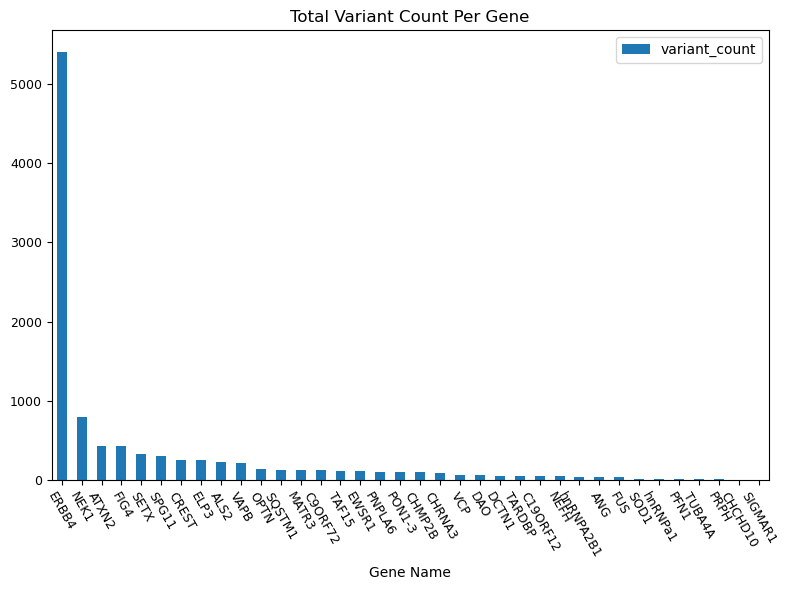

In [30]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [31]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'ATXN2', 'FIG4', 'SETX']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [32]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [33]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [34]:
hdf.reset_index(inplace=True)

In [35]:
hdf.head()

,index,count
0,HG03238,1678
1,HG02601,1351
2,HG03237,1465
3,HG03624,1609
4,HG03229,956


In [36]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1382.1875), 231.7555114884286)

## Find top and bottom genomes using mean & STD

In [37]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [38]:
len(top_genomes)

14

In [39]:
len(bottom_genomes)

12

In [40]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [41]:
sdf.head()

,HG03238,HG02601,HG03237,HG03624,HG03229,HG03660,HG03631,HG02648,HG02731,HG01583,...,HG03015,HG02655,HG02660,HG02651,HG03762,HG03703,HG02687,HG02728,HG03018,HG02780
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,9,9,6,13,5,4,35,4,37,...,24,25,2,20,3,27,5,21,19,22
ANG,0,0,10,1,6,0,11,0,0,2,...,0,0,2,0,7,10,6,0,0,0
ATXN2,157,22,10,21,25,26,8,10,20,13,...,6,19,24,17,10,13,15,14,6,10
C19ORF12,11,6,7,11,18,14,17,10,7,13,...,10,1,12,11,7,5,13,5,9,8
C9ORF72,14,25,16,34,32,35,22,2,20,37,...,24,23,35,12,13,15,47,31,16,24


In [42]:
tgdf= sdf.loc[top_genes]

In [43]:
tgdf_top_genomes = tgdf[top_genomes]

In [44]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [45]:
tgdf_top_genomes.head()

,HG03238,HG02731,HG01583,HG02682,HG02597,HG02733,HG02697,HG03640,HG03235,HG02699,HG03015,HG02651,HG02687,HG02728
gene,,,,,,,,,,,,,,
ERBB4,1167,1170,1123,1242,1098,1131,1287,1062,1250,1197,880,1086,963,1207
NEK1,46,320,209,49,212,211,209,194,9,190,222,41,208,40
ATXN2,157,20,13,10,13,21,18,20,10,11,6,17,15,14
FIG4,13,43,69,50,59,24,30,78,37,79,47,61,57,23
SETX,53,6,63,46,20,48,37,21,7,32,23,26,45,93


In [46]:
tgdf_bot_genomes.head()

,HG03229,HG02685,HG02649,HG03016,HG02787,HG02652,HG02684,HG03228,HG01586,HG02690,HG03709,HG03706
gene,,,,,,,,,,,,
ERBB4,503,559,496,703,323,585,809,514,634,645,428,587
NEK1,44,6,11,45,113,47,7,141,188,47,207,42
ATXN2,25,12,10,21,20,8,9,13,16,24,21,11
FIG4,33,24,22,49,71,53,3,48,21,46,30,39
SETX,44,29,11,7,6,59,8,7,7,27,18,29


## Plot stacked bar chart for top genes & top genomes

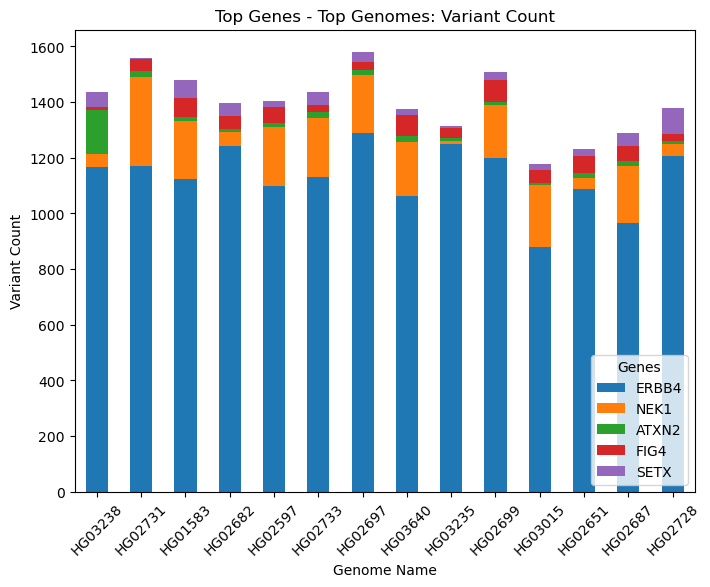

In [47]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

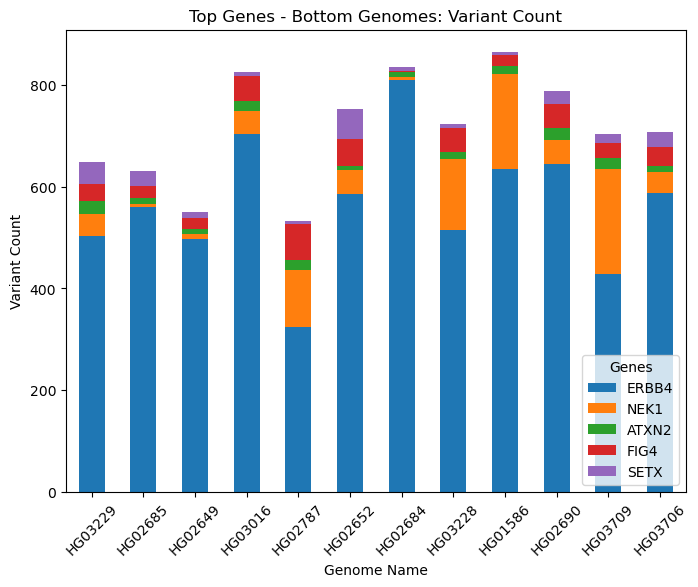

In [48]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()